## Ligand-protein contact probabilities for the following contact types: ## 
***
1. Charge-charge contact 
2. Hydrophobic contact 
3. Aromatic stacking 
4. Hydrogen bonding 
5. Dual protein residue contact 

### imports ###

In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns

from docking_tools.trajectory_analysis import charge_contacts_, hphob_contacts_, aro_contacts_, hbond_, dual_contact_

### example trajectory analysis ###

In [122]:
# Loading in a trajectory in from my local desktop
traj_dir = '/Users/anjalidhar/Desktop/MD/trajectories/41bf_selections'
trajectory = md.load(f'{traj_dir}/c_0_selection.xtc', top=f'{traj_dir}/41bf.pdb')

# Using the previously defined functions to get contacts 
# Providing ligand residue index, charge atom indices, and aromatic indices where necessary
charge_contacts = charge_contacts_(trajectory, Ligand_Pos_Charges=[296])
hydrophob_contacts = hphob_contacts_(trajectory, 20) 
aro_stacking = aro_contacts_(trajectory, ligand_rings=[[304, 305, 306, 307, 308, 309, 310, 311, 312, 313]])
hydrogen_bond = hbond_(trajectory, 20, lig_hbond_donors=[[296, 331],[296, 318]])
dual_contact = dual_contact_(trajectory, 20)

Ligand Aromatics Rings: 1
1001 3
====> TYR125
q1: 6 q2: 7 q3: 5 q4: 5
q1: 0.2608695652173913 q2: 0.30434782608695654 q3: 0.21739130434782608 q4: 0.21739130434782608
[ 2.28719065 87.45981888 90.20683206 55.6807802  57.65499827]
===>Contacts: 83 Total: 60 P-stack: 53 T-stack: 7
====> TYR133
q1: 11 q2: 15 q3: 13 q4: 9
q1: 0.22916666666666666 q2: 0.3125 q3: 0.2708333333333333 q4: 0.1875
[ 1.65201556 89.68434127 91.24690481 53.50536887 55.25059779]
===>Contacts: 122 Total: 94 P-stack: 88 T-stack: 6
====> TYR136
q1: 11 q2: 6 q3: 16 q4: 10
q1: 0.2558139534883721 q2: 0.13953488372093023 q3: 0.37209302325581395 q4: 0.23255813953488372
[ 1.89864588 90.94150114 90.65710824 53.65622805 54.12807126]
===>Contacts: 122 Total: 89 P-stack: 84 T-stack: 5


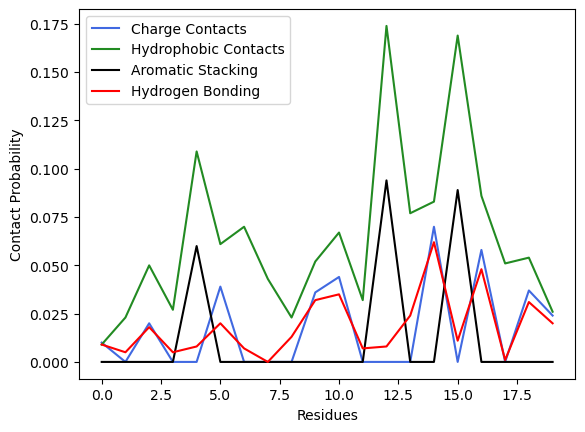

In [123]:
# Visualizing the various contacts for the trajectory 
plt.figure()
plt.plot(charge_contacts.mean(0), c='royalblue', label='Charge Contacts') 
plt.plot(hydrophob_contacts.mean(0), c='forestgreen', label='Hydrophobic Contacts') 
plt.plot(aro_stacking.mean(0), c='black', label='Aromatic Stacking') 
plt.plot(hydrogen_bond.mean(0), c='red', label='Hydrogen Bonding') 
plt.ylabel('Contact Probability')
plt.xlabel('Residues')
plt.legend()

<Axes: >

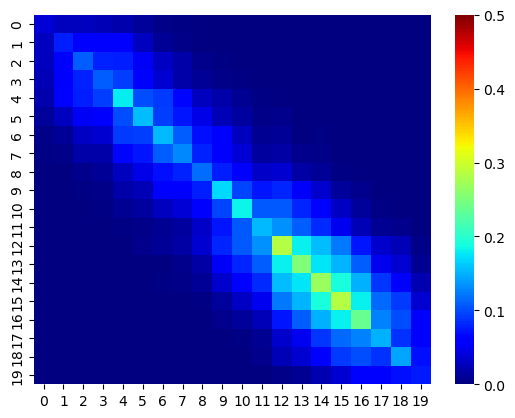

In [108]:
# Visualizing the dual residue contacts for the trajectory
sns.heatmap(dual_contact, cmap = 'jet', vmax=0.5)